# New Cloud Data from Jan

Isabel Fernandez \
August 5, 2024

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
DATADIR = '/home/ifernand/Cloud_SynthData_Proj/Antolik_Data/LSV1M_for_ML_MotionClouds/'
stim = np.load(DATADIR+'motion_cloud_batch_length=20000_seed=7216_res=220_spatial_sca=6.npy')
data = np.load(DATADIR+'responses_motion_cloud_batch_length=20000_seed=5242_res=220_spatial_sca=6.pickle', allow_pickle=True)

## Stimuli

In [19]:
stim.shape

(20000, 220, 220)

In [20]:
stim.dtype

dtype('float64')

(-0.5, 219.5, 219.5, -0.5)

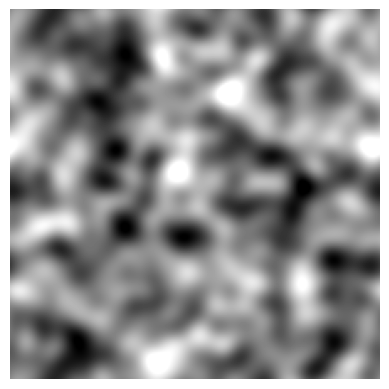

In [23]:
plt.imshow(stim[5,:,:], cmap='gray')
plt.axis('off')
#plt.colorbar()

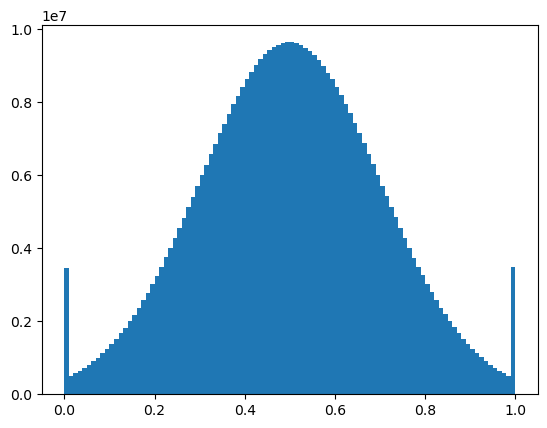

In [6]:
plt.hist(stim.reshape(-1),bins=100)
plt.show()

In [7]:
scaled_stim = stim*255

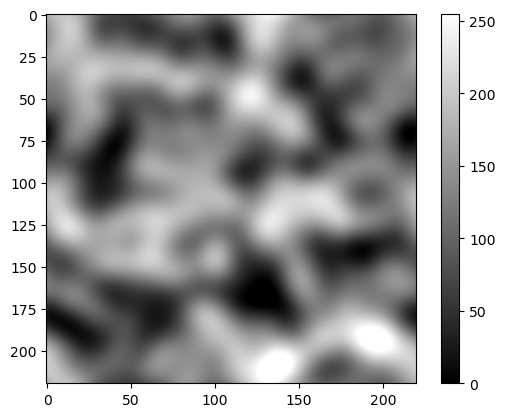

In [8]:
plt.imshow(scaled_stim[0,:,:], cmap='gray')
plt.colorbar()

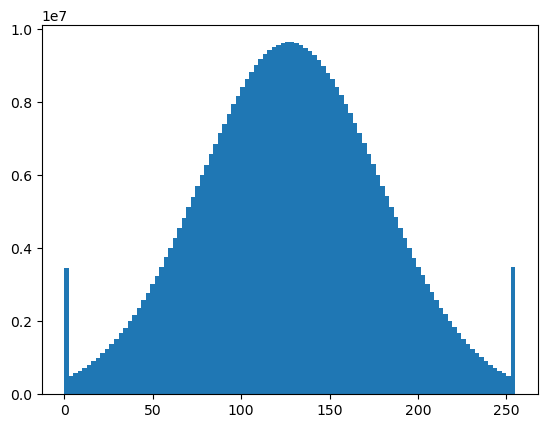

In [9]:
plt.hist(scaled_stim.reshape(-1),bins=100)
plt.show()

In [10]:
int8_stim = scaled_stim.astype(np.uint8)

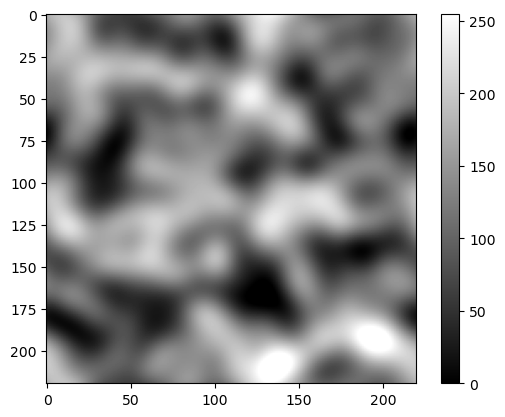

In [11]:
plt.imshow(int8_stim[0,:,:], cmap='gray')
plt.colorbar()

In [12]:
_stim = int8_stim.astype(np.float64)
_stim = _stim/255

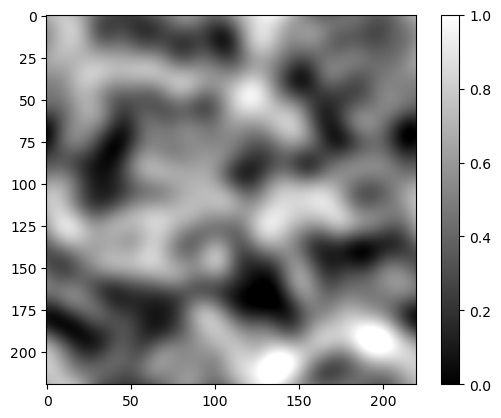

In [13]:
plt.imshow(_stim[0,:,:], cmap='gray')
plt.colorbar()

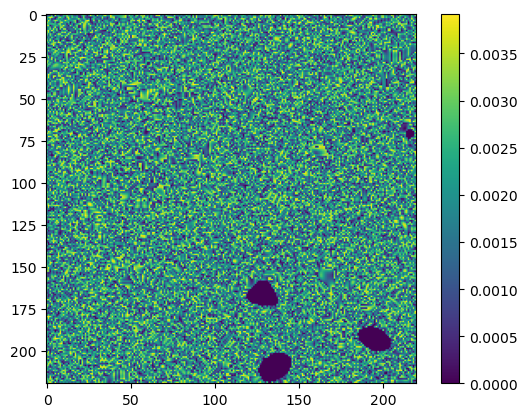

In [14]:
plt.imshow(stim[0,:,:]-_stim[0,:,:])
plt.colorbar()

In [ ]:
# scale values -> turn to int -> to byte
# encode as byte datatype=np.int8

## Observed Response

In [3]:
list(data.keys())[0]

'{"module_path" :"mozaik.stimuli.vision.visual_stimulus","background_luminance":50.0, "density":20.0, "direct_stimulation_name":None, "direct_stimulation_parameters":None, "duration":320000.0, "frame_duration":16, "location_x":0.0, "location_y":0.0, "movie_name":\'motion_cloud_batch_length=20000_seed=5242_res=220_spatial_sca=6.npy\', "movie_path":\'./\', "name":\'PixelMovieFromFile\', "size":None, "size_x":11.0, "size_y":11.0, "trial":None}'

In [4]:
data_dict = list(data.values())[0]
data_regions = list(data_dict.keys())
data_regions

['V1_Exc_L2/3', 'V1_Exc_L4', 'X_ON', 'V1_Inh_L4', 'V1_Inh_L2/3', 'X_OFF']

In [5]:
for i in range(len(data_regions)):
    print(data_regions[i], data_dict[data_regions[i]].shape)

V1_Exc_L2/3 (1, 37500)
V1_Exc_L4 (1, 37500)
X_ON (1, 7200)
V1_Inh_L4 (1, 9375)
V1_Inh_L2/3 (1, 9375)
X_OFF (1, 7200)


(9040,)


Text(0.5, 0, 'spike number')

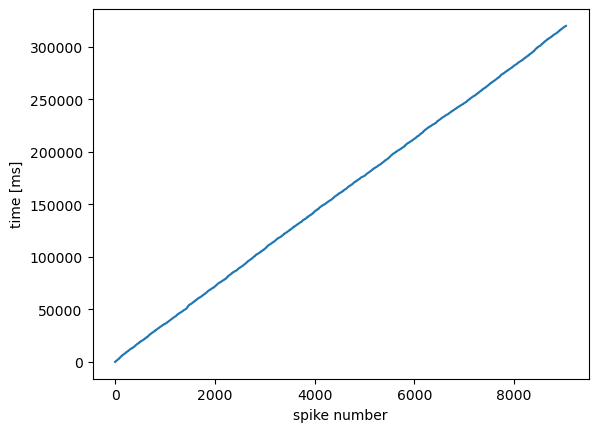

In [6]:
spike = data_dict['X_OFF'][0,1]
print(spike.shape)
plt.plot(spike)
plt.ylabel('time [ms]')
plt.xlabel('spike number')

In [44]:
data_dict['X_ON'][0,0]

array([8.180000e+01, 1.342000e+02, 1.633000e+02, ..., 3.199131e+05,
       3.199249e+05, 3.199290e+05])

In [7]:
spike

array([3.780000e+01, 6.010000e+01, 7.570000e+01, ..., 3.196780e+05,
       3.196825e+05, 3.197020e+05])

In [24]:
spike_hist = np.histogram(spike, bins=stim.shape[0], range=(0,160000))

In [60]:
spike_hist[0][:10]

array([0, 0, 0, 0, 1, 2, 0, 0, 1, 0])

In [ ]:
np.histogram(data_dict[data_regions[0]])

In [61]:
spike_count1 = np.histogram(spike, bins=stim.shape[0], range=(0,160000))[0]
spike_count2 = np.histogram(spike, bins=stim.shape[0], range=(0,160000))[0]

In [69]:
x = np.append(spike_count1.reshape(spike_count1.shape[0],1),spike_count2.reshape(spike_count2.shape[0],1), axis=1)

In [70]:
x.shape

(60000, 2)

## Make File

In [3]:
file_names = []
for file_name in os.listdir(DATADIR):
    if file_name.startswith('motion'):
        file_names.append(file_name[:-4])

In [4]:
file_names

['motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=6',
 'motion_cloud_batch_length=20000_seed=6691_res=220_spatial_sca=3',
 'motion_cloud_batch_length=20000_seed=6691_res=220_spatial_sca=9',
 'motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=9',
 'motion_cloud_batch_length=20000_seed=6672_res=220_spatial_sca=9',
 'motion_cloud_batch_length=20000_seed=1428_res=220_spatial_sca=6',
 'motion_cloud_batch_length=20000_seed=6672_res=220_spatial_sca=6',
 'motion_cloud_batch_length=20000_seed=5242_res=220_spatial_sca=9',
 'motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=3',
 'motion_cloud_batch_length=20000_seed=6672_res=220_spatial_sca=3',
 'motion_cloud_batch_length=20000_seed=7216_res=220_spatial_sca=6',
 'motion_cloud_batch_length=20000_seed=5242_res=220_spatial_sca=3',
 'motion_cloud_batch_length=20000_seed=4367_res=220_spatial_sca=9',
 'motion_cloud_batch_length=10000_seed=857_res=220_spatial_sca=3',
 'motion_cloud_batch_length=20000_seed=4367_res=2

In [5]:
len(file_names)

27

In [39]:
file_names[0]

'motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=6'

In [55]:
OLDDATA = '/home/ifernand/SynthData_Proj/Antolik_Dec23/Dic23data_March24_Update/'
pos = np.load(OLDDATA+'neuron_positions.pickle', allow_pickle=True)
ori = np.load(OLDDATA+'neuron_annotations.pickle', allow_pickle=True)
print(list(pos.keys()))
print(ori.keys())

['X_ON', 'X_OFF', 'V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3']
odict_keys(['X_ON', 'X_OFF', 'V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3'])


In [37]:
for i in range(len(data_regions)):
    print(data_regions[i], data_dict[data_regions[i]].shape, len(ori[data_regions[i]]))

V1_Inh_L2/3 (1, 9375) 9375
X_OFF (1, 7200) 7200
X_ON (1, 7200) 7200
V1_Inh_L4 (1, 9375) 9375
V1_Exc_L4 (1, 37500) 37500
V1_Exc_L2/3 (1, 37500) 37500


In [52]:
N_files = 3

file_start_pos = [0] # starting position for each data file in time searies
for i in range(N_files):
    print(i)
    stim_i = np.load(DATADIR+file_names[i]+'.npy')
    scaled_stim = stim_i*255
    int8_stim = scaled_stim.astype(np.uint8)
    if i == 0:
        stim = int8_stim
        file_start_pos.append(stim.shape[0])
    elif i == N_files:
        stim = np.append(stim, int8_stim, axis=0)
    else:
        stim = np.append(stim, int8_stim, axis=0)
        file_start_pos.append(stim.shape[0])

0
1
2


In [53]:
stim.shape

(60000, 220, 220)

In [54]:
file_start_pos

[0, 20000, 40000, 60000]

In [47]:
file_names[:3]

['motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=6',
 'motion_cloud_batch_length=20000_seed=4385_res=220_spatial_sca=9',
 'motion_cloud_batch_length=20000_seed=1428_res=220_spatial_sca=6']

## Position and Orientation

In [71]:
OLDDATA = '/home/ifernand/SynthData_Proj/Antolik_Dec23/Dic23data_March24_Update/'
ori_info = np.load(OLDDATA+'neuron_annotations.pickle', allow_pickle=True)

In [72]:
ori_info.keys()

odict_keys(['X_ON', 'X_OFF', 'V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3'])

In [76]:
ori_info['V1_Exc_L4'][0]['LGNAfferentOrientation']

2.2834021314491455

## Bin Size

In [14]:
DATADIR = '/home/ifernand/Cloud_SynthData_Proj/Antolik_Data/LSV1M_for_ML_MotionClouds/'
file_names = []
for file_name in os.listdir(DATADIR):
    if file_name.startswith('motion'):
        file_names.append(file_name[:-4])

N_files = len(file_names) # number of data files

In [30]:
file_start_pos = [0] # starting position for each data file in time searies
file_NT        = []  # number of time points in each file
stim_list      = []  # list of stimuli
for i in range(2):
    stim_i = np.load(DATADIR+file_names[i]+'.npy')
    file_NT.append(stim_i.shape[0])

    # convert stim to int8 values
    scaled_stim = stim_i*255
    int8_stim = scaled_stim.astype(np.uint8)
        
    if i == N_files-1:
        stim_list.append(int8_stim)
    else:
        stim_list.append(int8_stim)
        file_start_pos.append(int8_stim.shape[0]+file_start_pos[i])

In [31]:
file_start_pos

[0, 20000, 40000]

In [32]:
stim = np.zeros((sum(file_NT),220,220), dtype=np.uint8)
for i in range(2):
    if i == N_files-1:
        stim[file_start_pos[i]:,:,:] = stim_list[i]
    else:
        stim[file_start_pos[i]:file_start_pos[i+1],:,:] = stim_list[i]

In [33]:
stim.shape

(40000, 220, 220)

In [17]:
stim_i.shape

(20000, 220, 220)

In [36]:
WORKDIR = '/home/ifernand/Cloud_SynthData_Proj/'
cell_sq_rad = 0.3
# POSITION AND ORINETATION
# ========================
pos_info = np.load(WORKDIR+'data/all_neuron_RF_centers_in_deg.pkl', allow_pickle=True) # RF position

cell_type_list = ['X_ON', 'X_OFF', 'V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3'] # list of cell type in data set (LGN ON, V1 L 4, etc.)
cell_key = []                     # list of cell keys in order
cell_idx_dict = {}                # dictionary of cell type chosen indecies

for i in range(len(cell_type_list)):
    cell_type  = cell_type_list[i]
    cell_x_pos = pos_info[cell_type][0,:]
    cell_y_pos = pos_info[cell_type][1,:]

    # chosse neurons based on position
    cell_x_pos_idx = np.where(np.logical_and(cell_x_pos>=-1*cell_sq_rad,cell_x_pos<=cell_sq_rad))[0] 
    cell_y_pos_idx = np.where(np.logical_and(cell_y_pos>=-1*cell_sq_rad,cell_y_pos<=cell_sq_rad))[0]
        
    # indecies for chosen cells
    cell_idx       = list(np.intersect1d(cell_x_pos_idx, cell_y_pos_idx))
    cell_NC        = len(cell_idx)

    chosen_x_pos = cell_x_pos[cell_idx]
    chosen_y_pos = cell_y_pos[cell_idx]

    if i == 0:
        all_x_pos = chosen_x_pos
        all_y_pos = chosen_y_pos
    else:
        all_x_pos = np.append(all_x_pos, chosen_x_pos)
        all_y_pos = np.append(all_y_pos, chosen_y_pos)

    cell_key += [cell_type]*cell_NC
    cell_idx_dict[cell_type] = cell_idx

In [80]:
# SPIKE TIMES
# ===========
spike_time = []
for i in range(N_files):
    data = np.load(DATADIR+'responses_'+file_names[i]+'.pickle', allow_pickle=True)
    data_dict = list(data.values())[0]
    idx = 0

    for j in range(len(cell_type_list)):
        cell_type = cell_type_list[j]
        cell_data = data_dict[cell_type]
        cell_idx  = cell_idx_dict[cell_type]
        cell_NC   = len(cell_idx)
            
        for k in range(cell_NC):
            if i == 0:
                spike_time.append(cell_data[0,cell_idx[k]])
                spike_time[idx] = np.append(spike_time[idx],-1)
            else:
                spike_time[idx] = np.append(spike_time[idx],cell_data[0,cell_idx[k]])
                spike_time[idx] = np.append(spike_time[idx],-1)
            idx += 1

In [81]:
len(spike_time)

1705

In [82]:
len(np.where(spike_time[0] == -1)[0])

27

In [50]:
N_files

27

In [70]:
spike_time[0][0]

[20.599999999999994,
 39.0,
 45.099999999999994,
 60.20000000000002,
 68.80000000000001,
 84.5,
 130.3,
 139.10000000000002,
 146.7,
 153.10000000000002,
 158.2,
 167.2,
 171.40000000000003,
 178.0,
 184.10000000000002,
 189.40000000000003,
 387.70000000000005,
 391.70000000000005,
 395.70000000000005,
 401.4,
 413.4,
 428.5,
 444.20000000000005,
 523.3000000000001,
 531.7,
 538.9,
 544.3000000000001,
 550.2,
 604.5,
 681.9,
 689.6,
 697.4,
 704.1,
 772.5,
 784.0,
 793.0,
 799.5,
 909.7,
 925.8,
 939.4000000000001,
 944.2,
 1016.1000000000001,
 1033.7,
 1066.0,
 1070.4,
 1208.4,
 1214.6000000000001,
 1221.2,
 1231.5,
 1238.5,
 1246.8,
 1250.7,
 1263.9,
 1276.8,
 1339.7,
 1345.1000000000001,
 1366.4,
 1370.8,
 1378.4,
 1386.6000000000001,
 1392.5,
 1400.3,
 1404.0,
 1413.0,
 1418.3,
 1426.9,
 1523.6000000000001,
 1531.2,
 1536.1000000000001,
 1544.6000000000001,
 1552.5,
 1562.3,
 1569.4,
 1609.9,
 1624.2,
 1714.1000000000001,
 1720.0,
 1725.5,
 1729.9,
 1736.5,
 1742.2,
 1748.600000000